In [5]:
from scipy.io import arff
import pandas as pd
import numpy as np
# data, meta = arff.loadarff('KDDTest+.arff')


We're going to make an anomaly detection system

In [ ]:
df = pd.read_csv("unsw.csv")

In [7]:
df.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

In [8]:
df

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,59.166.0.8,12520,149.171.126.6,31010,tcp,FIN,0.020383,320,1874,31,...,0,8,20,7,5,1,1,4,NaN,0
699997,59.166.0.0,18895,149.171.126.9,80,tcp,FIN,1.402957,19410,1087890,31,...,0,1,1,2,7,2,2,2,NaN,0
699998,59.166.0.0,30103,149.171.126.5,5190,tcp,FIN,0.007108,2158,2464,31,...,0,13,13,6,7,2,1,2,NaN,0
699999,59.166.0.6,30388,149.171.126.5,111,udp,CON,0.004435,568,304,31,...,0,10,13,6,5,1,1,3,NaN,0


In [9]:
df["Label"].value_counts()

Label
0    677786
1     22215
Name: count, dtype: int64

In [10]:
df[df["Label"].isna()]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label


In [11]:
df[df["Label"].isna()]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label


In [12]:
df.duplicated().sum()

np.int64(59210)

In [13]:
df.duplicated().sum()

np.int64(59210)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
# no need for this category
df.drop("attack_cat",axis=1,inplace=True)

In [17]:
df.select_dtypes(include="object")

,srcip,sport,dstip,dsport,proto,state,service
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,dns
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,-
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,dns
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,dns
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,dns
...,...,...,...,...,...,...,...
699996,59.166.0.8,12520,149.171.126.6,31010,tcp,FIN,-
699997,59.166.0.0,18895,149.171.126.9,80,tcp,FIN,http
699998,59.166.0.0,30103,149.171.126.5,5190,tcp,FIN,-
699999,59.166.0.6,30388,149.171.126.5,111,udp,CON,-


In [18]:
def clean_basic_columns(df):
    df = df.copy()


    df["srcip"] = df["srcip"].astype(str).str.replace(".", "", regex=False)
    df["dstip"] = df["dstip"].astype(str).str.replace(".", "", regex=False)

    df["srcip"] = pd.to_numeric(df["srcip"], errors="coerce").astype("Int64")
    df["dstip"] = pd.to_numeric(df["dstip"], errors="coerce").astype("Int64")

    df["sport"] = pd.to_numeric(df["sport"], errors="coerce").astype("Int64")
    df["dsport"] = pd.to_numeric(df["dsport"], errors="coerce").astype("Int64")

    return df


df = clean_basic_columns(df)

In [19]:
df

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,5916600,1390,1491711266,53,udp,CON,0.001055,132,164,31,...,0,0,3,7,1,3,1,1,1,0
1,5916600,33661,1491711269,1024,udp,CON,0.036133,528,304,31,...,0,0,2,4,2,3,1,1,2,0
2,5916606,1464,1491711267,53,udp,CON,0.001119,146,178,31,...,0,0,12,8,1,2,2,1,1,0
3,5916605,3593,1491711265,53,udp,CON,0.001209,132,164,31,...,0,0,6,9,1,1,1,1,1,0
4,5916603,49664,1491711260,53,udp,CON,0.001169,146,178,31,...,0,0,7,9,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,5916608,12520,1491711266,31010,tcp,FIN,0.020383,320,1874,31,...,0,0,8,20,7,5,1,1,4,0
699997,5916600,18895,1491711269,80,tcp,FIN,1.402957,19410,1087890,31,...,0,0,1,1,2,7,2,2,2,0
699998,5916600,30103,1491711265,5190,tcp,FIN,0.007108,2158,2464,31,...,0,0,13,13,6,7,2,1,2,0
699999,5916606,30388,1491711265,111,udp,CON,0.004435,568,304,31,...,0,0,10,13,6,5,1,1,3,0


In [20]:
df.select_dtypes(include="object")

,proto,state,service
0,udp,CON,dns
1,udp,CON,-
2,udp,CON,dns
3,udp,CON,dns
4,udp,CON,dns
...,...,...,...
699996,tcp,FIN,-
699997,tcp,FIN,http
699998,tcp,FIN,-
699999,udp,CON,-


In [21]:
df[df["service"] == '-']

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
1,5916600,33661,1491711269,1024,udp,CON,0.036133,528,304,31,...,0,0,2,4,2,3,1,1,2,0
5,5916600,32119,1491711269,111,udp,CON,0.078339,568,312,31,...,0,0,2,4,2,3,1,1,2,0
7,10401823,0,10401823,0,arp,INT,0.000000,46,0,0,...,0,0,2,2,2,2,2,2,2,0
10,10401702,0,10401702,0,arp,INT,0.000000,46,0,0,...,0,0,2,2,2,2,2,2,2,0
14,5916601,24266,1491711269,41049,udp,CON,0.001851,528,304,31,...,0,0,8,4,2,5,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,5916606,8543,1491711266,45536,tcp,FIN,0.068897,4342,60892,31,...,0,0,10,20,7,5,1,1,1,0
699996,5916608,12520,1491711266,31010,tcp,FIN,0.020383,320,1874,31,...,0,0,8,20,7,5,1,1,4,0
699998,5916600,30103,1491711265,5190,tcp,FIN,0.007108,2158,2464,31,...,0,0,13,13,6,7,2,1,2,0
699999,5916606,30388,1491711265,111,udp,CON,0.004435,568,304,31,...,0,0,10,13,6,5,1,1,3,0


In [22]:
df["service"] = df["service"].replace("-", np.nan)

In [23]:
df[df["service"] == '-']

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label


In [24]:
columns_with_nulls = df.columns[df.isna().any()]

In [25]:
columns_with_nulls

Index(['sport', 'dsport', 'service'], dtype='object')

In [26]:
normal = df[df["Label"] == 0]

In [27]:
anomaly = df[df["Label"] == 1]

In [28]:
from sklearn.model_selection import train_test_split
X_normal = normal.drop(["Label"],axis=1)
y_normal = normal["Label"]
X_anomaly = anomaly.drop(["Label"],axis=1)
y_anomaly = anomaly["Label"]

In [29]:
X_train,X_Normal_temp,y_train,y_Normal_temp, = train_test_split(X_normal,y_normal,test_size=0.1,random_state=42)

In [30]:
X_Normal_val,X_Normal_test,y_Normal_val,y_Normal_test = train_test_split(X_Normal_temp,y_Normal_temp,test_size=0.5,random_state=42)

In [31]:
X_anomaly_val,X_anomaly_test,y_anomaly_val,y_anomaly_test = train_test_split(X_anomaly,y_anomaly,test_size=0.5,random_state=42)

In [32]:
import numpy as np

In [33]:
X_val = pd.concat([X_Normal_val,X_anomaly_val])
y_val = pd.concat([y_Normal_val,y_anomaly_val])
X_test = pd.concat([X_Normal_test,X_anomaly_test])
y_test = pd.concat([y_Normal_test,y_anomaly_test])

In [34]:
# X_train[]
X_train.select_dtypes(include="object")

,proto,state,service
154058,tcp,FIN,NaN
427680,tcp,FIN,NaN
112301,tcp,FIN,NaN
531462,tcp,FIN,smtp
7588,udp,CON,dns
...,...,...,...
129468,tcp,FIN,NaN
288133,tcp,FIN,http
396118,udp,CON,dns
156211,tcp,FIN,NaN


In [35]:
X_train.describe()

,srcip,sport,dstip,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
count,563859.0,563852.0,563859.0,563804.0,563859.000000,5.638590e+05,5.638590e+05,563859.000000,563859.000000,563859.000000,...,563859.000000,563859.000000,563859.000000,563859.000000,563859.000000,563859.000000,563859.000000,563859.000000,563859.000000,563859.000000
mean,102038902.604892,32597.107558,1618114170.178889,14510.294414,0.645728,4.624882e+03,4.466719e+04,32.518431,29.810834,6.140443,...,0.144247,0.017281,0.020544,5.942842,5.640470,3.711268,4.187859,1.394622,1.138347,1.882004
std,2693408437.913969,19073.609136,2794944383.096199,19872.99218,20.419109,1.328885e+04,1.710215e+05,18.535168,16.108070,9.290707,...,0.690832,0.130316,0.183518,4.545847,4.150028,2.829686,3.239093,1.220137,0.705574,1.580821
min,127001.0,0.0,127001.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5916602.0,15972.0,1491711262.0,53.0,0.004237,5.120000e+02,3.040000e+02,31.000000,29.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,5916605.0,32647.0,1491711264.0,5136.5,0.026931,2.062000e+03,3.380000e+03,31.000000,29.000000,4.000000,...,0.000000,0.000000,0.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000,1.000000
75%,5916607.0,49094.0,1491711267.0,26740.0,0.291045,3.806000e+03,2.312200e+04,31.000000,29.000000,7.000000,...,0.000000,0.000000,0.000000,8.000000,8.000000,5.000000,5.000000,1.000000,1.000000,2.000000
max,192168241243.0,65535.0,192168241243.0,65535.0,8786.637695,1.592581e+06,1.641360e+06,255.000000,254.000000,560.000000,...,36.000000,1.000000,8.000000,44.000000,42.000000,42.000000,50.000000,36.000000,34.000000,38.000000


We will definetely need to scale our data

In [36]:
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer,make_column_selector,make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer,OneHotEncoder
from sklearn.impute import SimpleImputer




num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
)
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="constant",fill_value="Unknown"),
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessing = ColumnTransformer([
("num", num_pipeline,make_column_selector(dtype_include= "number") ),
("cat",cat_pipeline,make_column_selector(dtype_include="object"))

])



In [37]:
X_train_processed = preprocessing.fit_transform(X_train)

In [38]:
preprocessing.get_feature_names_out()

array(['num__srcip', 'num__sport', 'num__dstip', 'num__dsport',
       'num__dur', 'num__sbytes', 'num__dbytes', 'num__sttl', 'num__dttl',
       'num__sloss', 'num__dloss', 'num__Sload', 'num__Dload',
       'num__Spkts', 'num__Dpkts', 'num__swin', 'num__dwin', 'num__stcpb',
       'num__dtcpb', 'num__smeansz', 'num__dmeansz', 'num__trans_depth',
       'num__res_bdy_len', 'num__Sjit', 'num__Djit', 'num__Stime',
       'num__Ltime', 'num__Sintpkt', 'num__Dintpkt', 'num__tcprtt',
       'num__synack', 'num__ackdat', 'num__is_sm_ips_ports',
       'num__ct_state_ttl', 'num__ct_flw_http_mthd', 'num__is_ftp_login',
       'num__ct_ftp_cmd', 'num__ct_srv_src', 'num__ct_srv_dst',
       'num__ct_dst_ltm', 'num__ct_src_ltm', 'num__ct_src_dport_ltm',
       'num__ct_dst_sport_ltm', 'num__ct_dst_src_ltm', 'cat__proto_arp',
       'cat__proto_esp', 'cat__proto_icmp', 'cat__proto_igmp',
       'cat__proto_ospf', 'cat__proto_tcp', 'cat__proto_udp',
       'cat__proto_udt', 'cat__state_ACC', 'cat_

In [80]:
X_train_processed = pd.DataFrame(X_train_processed,columns=preprocessing.get_feature_names_out())

In [81]:
pca = PCA(0.95)
X_train_processed_pca = pca.fit_transform(X_train_processed)

In [82]:
X_train_processed.shape

(563859, 76)

In [83]:
X_train_processed_pca.shape

(563859, 28)

we will try a variety of models. We will try to detect anomalies using,

PCA reconstruction,
Gaussian Mixture, and an isolation forest.


In [ ]:
X_val_transformed = preprocessing.transform(X_val)
X_val_transformed_pca = pca.transform(X_val_transformed)
X_val_reconstructed = pca.inverse_transform(X_val_transformed_pca)

In [85]:
errors = X_val_transformed- X_val_reconstructed
squared_errors = errors**2
sample_mse = squared_errors.mean(axis=1)

In [86]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
auc = roc_auc_score(y_val, sample_mse)
print("ROC-AUC:", auc)

ROC-AUC: 0.9879444473952513


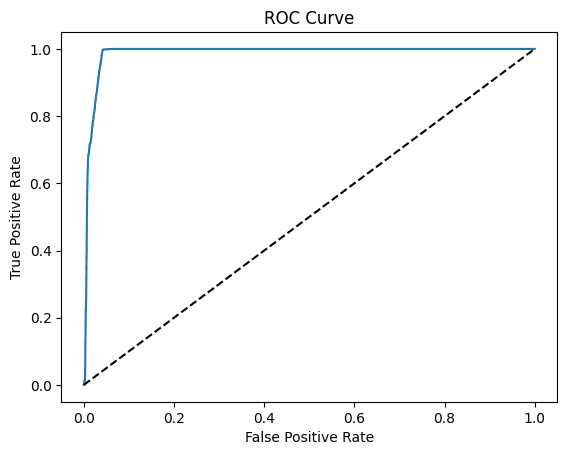

In [87]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, sample_mse)
j_scores = tpr - fpr
best_t = thresholds[np.argmax(j_scores)]
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [88]:
best_t


np.float64(0.05830062007145473)

In [90]:
threshold = best_t


In [91]:
y_val_pred =  (sample_mse > threshold).astype(int)
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     31326
           1       0.84      1.00      0.91      7140

    accuracy                           0.96     38466
   macro avg       0.92      0.98      0.95     38466
weighted avg       0.97      0.96      0.97     38466



In [92]:
from sklearn.metrics import f1_score

best_f1, best_t = 0, None
for t in thresholds:
    preds = (sample_mse > t).astype(int)
    score = f1_score(y_val, preds, average="macro")
    if score > best_f1:
        best_f1, best_t = score, t

print("Best threshold:", best_t)
print("Best F1:", best_f1)


Best threshold: 0.060577893771279756
Best F1: 0.9461709927478829


In [93]:
y_val_pred =  (sample_mse > best_t).astype(int)
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     31326
           1       0.85      0.99      0.91      7140

    accuracy                           0.97     38466
   macro avg       0.92      0.98      0.95     38466
weighted avg       0.97      0.97      0.97     38466



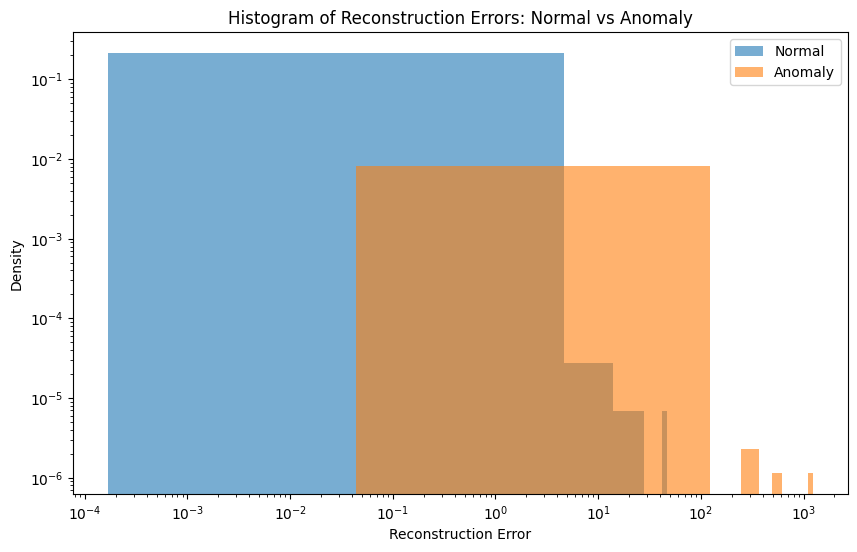

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# test_scores = your per-sample MSE/SSE
# y_test = 0 for normal, 1 for anomaly

plt.figure(figsize=(10,6))

plt.hist(sample_mse[y_val==0], bins=10, alpha=0.6, label="Normal", density=True)
plt.hist(sample_mse[y_val==1], bins=10, alpha=0.6, label="Anomaly", density=True)

plt.xlabel("Reconstruction Error")
plt.ylabel("Density")
plt.yscale("log")
plt.xscale("log")
plt.title("Histogram of Reconstruction Errors: Normal vs Anomaly")
plt.legend()
plt.show()


Had to us ea log scale due to how extreme some of the anomoly reconstruction errors were. This shows some overlap but overall it is well separated which explain why were getting a solid AUC score.

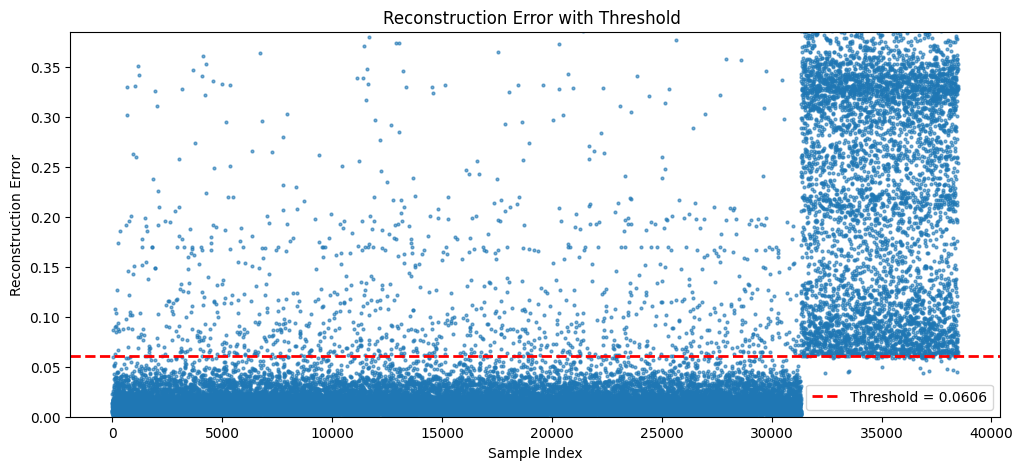

In [94]:
upper = np.percentile(sample_mse, 95)

plt.figure(figsize=(12,5))
plt.plot(sample_mse, '.', alpha=0.6, markersize=4)
plt.axhline(best_t, color='red', linestyle='--', linewidth=2,
            label=f"Threshold = {best_t:.4f}")

plt.ylim(0, upper)  
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error with Threshold ")
plt.legend()
plt.show()


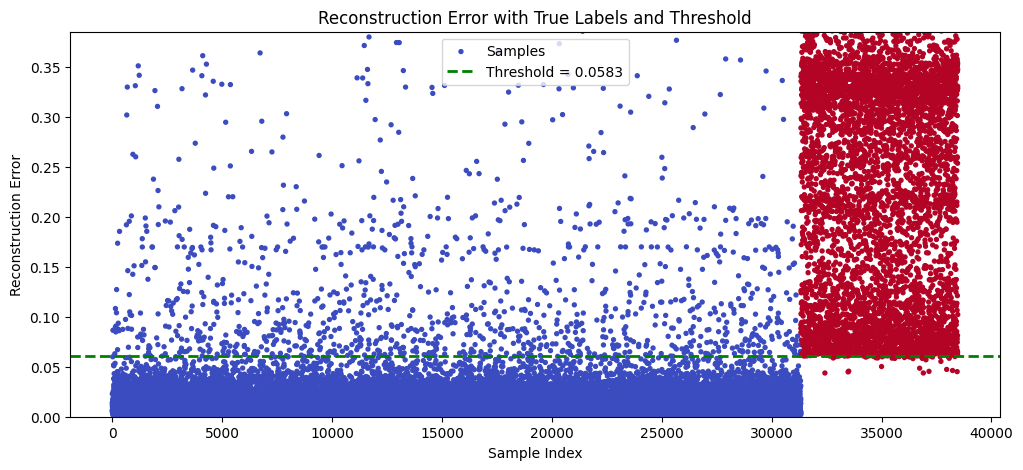

In [95]:
upper = np.percentile(sample_mse, 95)

plt.figure(figsize=(12,5))

plt.scatter(np.arange(len(sample_mse)),
            sample_mse,
            c=y_val,
            cmap="coolwarm",
            s=8,
            label="Samples")

plt.axhline(best_t, color='green', linestyle='--', linewidth=2,
            label=f"Threshold = {threshold:.4f}")

plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.ylim(0, upper)  
plt.title("Reconstruction Error with True Labels and Threshold")
plt.legend()
plt.show()


the threshold is very solid and the model is seperating the normal and anomylies super well. 

In [51]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=20, n_init=10, max_iter=1000,
                               random_state=42)

In [ ]:
bgm_pipeline = Pipeline(
    [
        ("preprocessing",preprocessing),
        # ("pca",PCA(0.95)),
    ]
)

In [ ]:
X_train_bgm = bgm_pipeline.fit_transform(X_train)

In [ ]:
bgm.fit(X_train_bgm)
print(bgm.weights_.round(2))

[0.1  0.   0.02 0.03 0.01 0.02 0.   0.   0.25 0.02 0.01 0.01 0.   0.
 0.27 0.   0.07 0.14 0.06 0.  ]


In [ ]:
X_normal,y_temp =bgm.sample(500)
normal_scores = bgm.score_samples(X_normal)
print(np.mean(normal_scores))

273.7013681564184


In [ ]:
X_val_bgm = bgm_pipeline.transform(X_val)
val_scores = bgm.score_samples(X_val_bgm)

In [ ]:
auc = roc_auc_score(y_val, -val_scores)
print("ROC-AUC:", auc)

ROC-AUC: 0.990174296111856


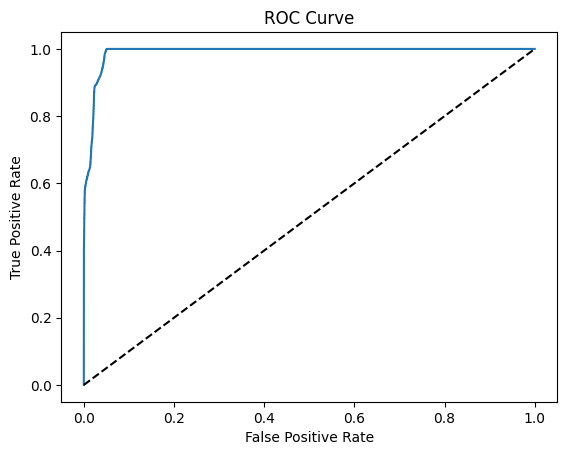

In [ ]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, -val_scores)
j_scores = tpr - fpr
best_t = thresholds[np.argmax(j_scores)]
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [ ]:

best_f1, best_t_bgm = 0, None
for t in thresholds:
    preds = (-val_scores > t).astype(int)
    score = f1_score(y_val, preds,average="macro")
    if score > best_f1:
        best_f1, best_t_bgm = score, t

print("Best threshold:", best_t_bgm)
print("Best F1:", best_f1)


Best threshold: -231.13131360388448
Best F1: 0.9375038748237705


In [ ]:
y_val_pred =  (-val_scores > best_t_bgm ).astype(int)
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     31326
           1       0.82      0.99      0.90      7140

    accuracy                           0.96     38466
   macro avg       0.91      0.97      0.94     38466
weighted avg       0.97      0.96      0.96     38466



The pca reconstruction best f1 score is slightly better while having an almost identical ROC-AUC score.

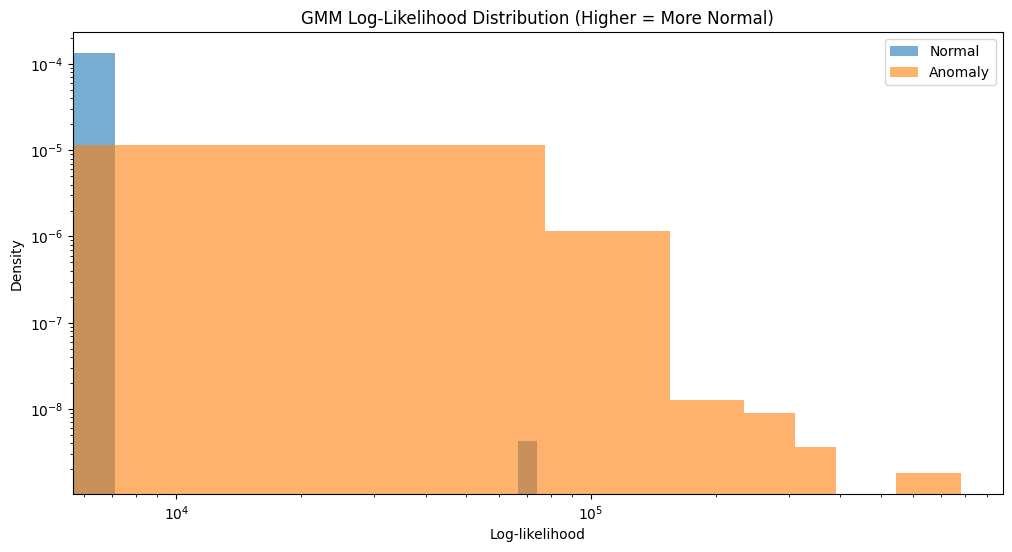

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

normal_scores   = -val_scores[y_val == 0]
anomaly_scores  = -val_scores[y_val == 1]

plt.figure(figsize=(12,6))
plt.hist(normal_scores, bins=10, alpha=0.6, label="Normal", density=True)
plt.hist(anomaly_scores, bins=10, alpha=0.6, label="Anomaly", density=True)

plt.title("GMM Log-Likelihood Distribution (Higher = More Normal)")
plt.xlabel("Log-likelihood")
plt.ylabel("Density")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()


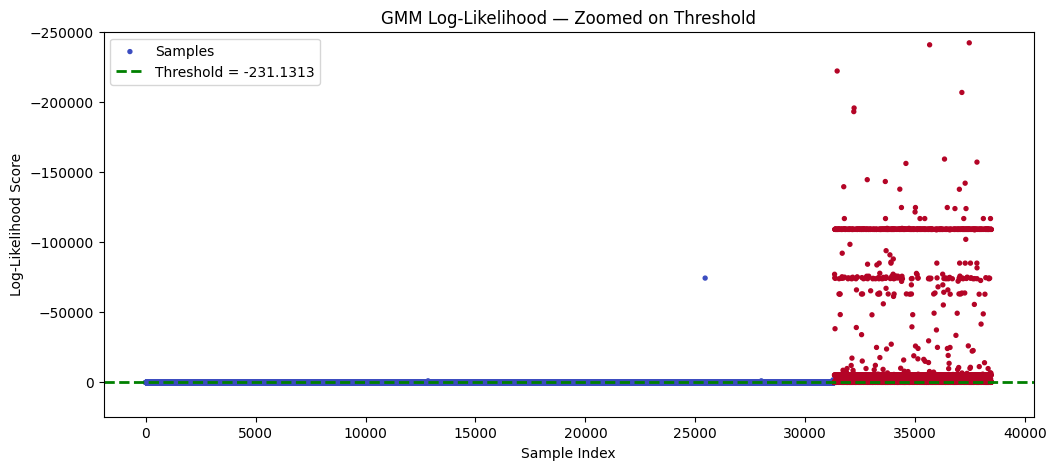

In [ ]:
window = 250000

lower = best_t_bgm - window 
upper = best_t_bgm + window/10 

plt.figure(figsize=(12,5))

plt.scatter(
    np.arange(len(val_scores)),
    val_scores,
    c=y_val,
    cmap="coolwarm",
    s=8,
    label="Samples"
)

plt.axhline(
    best_t_bgm,
    color='green',
    linestyle='--',
    linewidth=2,
    label=f"Threshold = {best_t_bgm:.4f}"
)

plt.xlabel("Sample Index")
plt.ylabel("Log-Likelihood Score")

# Invert axis (GMM: higher = normal, lower = anomaly)
plt.ylim(upper, lower)

plt.title("GMM Log-Likelihood — Zoomed on Threshold")
plt.legend()
plt.show()


Based on all of the previous graphs we can observe a similar result to the pca reconstruction however slightly less aggressive aggresive separation between anamolies and normal samples while also also being a much slower model.

In [57]:
from sklearn.ensemble import IsolationForest
islf = IsolationForest(n_estimators=200, random_state=42)

In [58]:
islf_pipeline = Pipeline([
    ("preprocessing",preprocessing),
    # ("pca",PCA(0.95))
])

In [59]:
X_train_islf = islf_pipeline.fit_transform(X_train)

In [60]:
islf.fit(X_train_islf)

,n_estimators,200
,max_samples,'auto'
,contamination,'auto'
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [61]:
X_val_islf = islf_pipeline.transform(X_val)
val_scores_1 = islf.score_samples(X_val_islf)

In [62]:
auc = roc_auc_score(y_val,-val_scores_1)
print(auc)

0.984955427615725


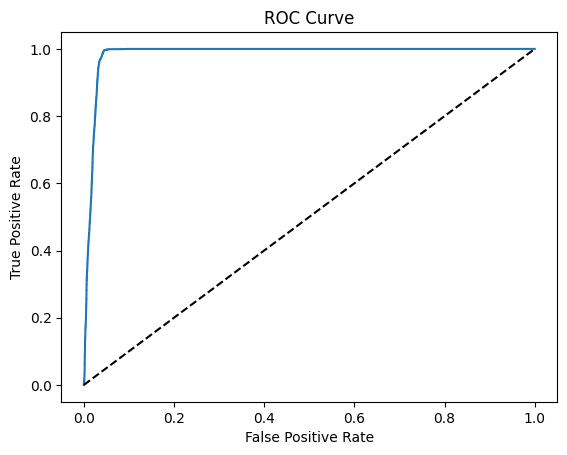

In [63]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, -val_scores_1)
j_scores = tpr - fpr
best_t = thresholds[np.argmax(j_scores)]
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [64]:

best_f1, best_t_islf = 0, None
for t in thresholds:
    preds = (-val_scores_1 > t).astype(int)
    score = f1_score(y_val, preds,average="macro")
    if score > best_f1:
        best_f1, best_t_islf = score, t

print("Best threshold:", best_t_islf)
print("Best F1:", best_f1)


Best threshold: 0.5286903105269197
Best F1: 0.9447109278806318


In [65]:
y_val_pred_1 =  (-val_scores_1 >(best_t_islf ) ).astype(int)
print(classification_report(y_val,y_val_pred_1))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     31326
           1       0.86      0.96      0.91      7140

    accuracy                           0.97     38466
   macro avg       0.93      0.96      0.94     38466
weighted avg       0.97      0.97      0.97     38466



ROC-AUC:

1. bgm: 99%

2. pca reconstruction: 98.8%

3. islf: 98.5%

Macro-f1:

1. pca: 95%

2. islf: 94%

3. bgm: 94% but lower than islf because of lower accuracy, weighted f1 and individual f1

Speed:

1. pca

2. islf

3. bgm extremely slow


The ROC-AUC for the bgm and pca are very similar while the pca model beats the bgm in every other way and is also more interpretable therefore we will continue with this model.


In [96]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class pcaReconstruction(BaseEstimator, TransformerMixin):
    def __init__(self, pca, threshold=None):
        self.pca = pca
        self.threshold = threshold   # store threshold
    
    def fit(self, X, y=None):
        self.pca.fit(X)
        return self

    def transform(self, X):
        return X

    def predict(self, X):
        X_test_transformed_pca = pca.transform(X)
        X_test_reconstructed = pca.inverse_transform(X_test_transformed_pca)
        errors = X - X_test_reconstructed
        squared_errors = errors**2
        scores = squared_errors.mean(axis=1)
        scores = scores.reshape(-1)

        if self.threshold is None:
            raise ValueError("Threshold has not been set. Please set threshold before predicting.")

        return (scores > self.threshold).astype(int)


In [99]:
final_pipeline = Pipeline([
    ("preprocessing",preprocessing),
    ("pca", pcaReconstruction(pca=pca,threshold=threshold))
])

In [100]:
final_pipeline.fit(X_train)

,steps,"[('preprocessing', ...), ('pca', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
preds = final_pipeline.predict(X_test)

In [102]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     31326
           1       0.83      1.00      0.91      7140

    accuracy                           0.96     38466
   macro avg       0.92      0.98      0.94     38466
weighted avg       0.97      0.96      0.96     38466



In [104]:
preprocessing.fit(X_train)
X_test_processed = preprocessing.transform(X_test)
X_test_transformed_pca = pca.transform(X_test_processed)
X_test_reconstructed = pca.inverse_transform(X_test_transformed_pca)
errors = X_test_processed - X_test_reconstructed
squared_errors = errors**2
scores = squared_errors.mean(axis=1)
print(roc_auc_score(y_test,scores))

0.9876936601110469


Solid ROC-AUC score and the model generalizes well with the chosen threshold. Overall quite satisfied wth it's performance.

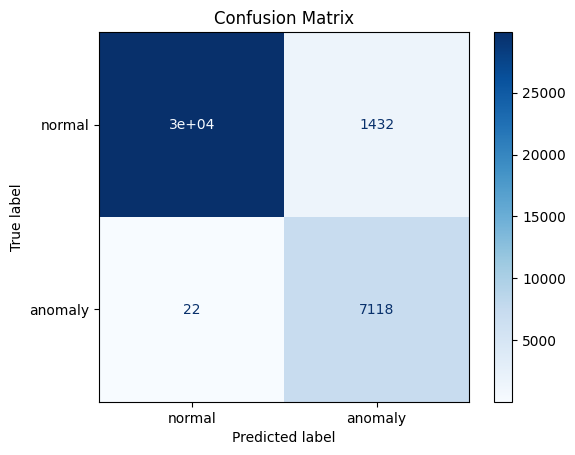

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
class_labels = ["normal", "anomaly"]
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues) # You can choose different colormaps
plt.title("Confusion Matrix")
plt.show()


Only 22 of 7,118 attacks missed (99.97% recall) with 1,432 false alarms from 30,000 normal samples (4.8% FPR) - acceptable tradeoff for zero-day detection

In [106]:
import joblib
joblib.dump(final_pipeline,"pca_anomaly_detection")

['pca_anomaly_detection']

Feature Importance


In [107]:
X_anom = X_test[y_test == 1]    # only anomaly samples
X_anom_preprocessed = preprocessing.transform(X_anom)
X_anom_reduced = pca.transform(X_anom_preprocessed)
X_anom_reconstructed = pca.inverse_transform(X_anom_reduced)


In [108]:
import numpy as np

errors = np.abs(X_anom_preprocessed - X_anom_reconstructed)
feature_importance = errors.mean(axis=0)
indices = np.argsort(feature_importance)[::-1]
feature_names = preprocessing.get_feature_names_out()



In [112]:
print("Top 15 Most Important Features (By Reconstruction Error):\n")
top_features = {}
for i in range(15):
    idx = indices[i]
    top_features[feature_names[idx]] = feature_importance[idx]
    print(f"{i+1}. {feature_names[idx]} — importance: {feature_importance[idx]:.4f}")


Top 15 Most Important Features (By Reconstruction Error):

1. num__sttl — importance: 2.7097
2. num__ct_state_ttl — importance: 1.8938
3. num__dttl — importance: 1.2159
4. num__synack — importance: 0.9969
5. num__ackdat — importance: 0.9585
6. num__dstip — importance: 0.7305
7. num__srcip — importance: 0.6505
8. num__Sload — importance: 0.5835
9. num__is_sm_ips_ports — importance: 0.4845
10. cat__service_Unknown — importance: 0.4464
11. num__sbytes — importance: 0.4051
12. num__Sintpkt — importance: 0.3844
13. num__dmeansz — importance: 0.3541
14. num__ct_dst_sport_ltm — importance: 0.3489
15. num__ct_flw_http_mthd — importance: 0.3444


A. TTL-related features (sttl, dttl, ct_state_ttl)

TTL inconsistencies are classic indicators of spoofed packets, unusual routing paths, or artificially crafted traffic. When the model flags these, it’s typically detecting packets that don’t match normal hop counts or expected flow states.

B. TCP handshake and session behavior (synack, ackdat)

Abnormal SYN-ACK and ACK behavior often point to scanning, incomplete sessions, flooding attempts, or manipulation of TCP handshakes. These deviations suggest automated or malicious session creation.

C. IP-related anomalies (srcip, dstip, is_sm_ips_ports)

Unusual or rare source/destination IPs and uncommon IP/port combinations strongly correlate with probing, spoofing, or attacks originating from unexpected network locations.

D. Payload size, byte patterns, and timing (Sload, sbytes, Sintpkt, dmeansz)

Irregular payload sizes, unexpected byte counts, or strange packet timing patterns typically signal data exfiltration, tunneling, or automated bot-like behavior.

E. Service & protocol anomalies (service_Unknown, ct_flw_http_mthd)

Unknown or rare services, along with unusual HTTP methods, indicate nonstandard application-layer behavior—often associated with exploitation tools or malformed requests.

F. Port/activity frequency (ct_dst_sport_ltm)

Unexpected destination port access frequencies point directly to port scans or probing behavior on uncommon services.

These features indicate classic attack behavior: spoofed or forged packets (TTL anomalies), scanning and handshake abuse (SYN/ACK irregularities), probing of unusual IP/port combinations, abnormal payload sizes suggesting tunneling or exfiltration, and interaction with unknown or suspicious services together signaling reconnaissance, evasion, and early-stage intrusion activity.